In [20]:
import random
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [21]:
class Grafo:
  def __init__(self, arquivo):
    
    grafo = self.__remover_espaco(open(arquivo).read().split('\n'))
    
    self.arquivo = arquivo
    self.vertices = int(grafo[0])
    self.lista_adjacencias = self.__cria_lista(grafo[1:])
    self.matriz_adjacencias = self.__cria_matriz(grafo[1:])
    self.lista_arestas = self.__cria_lista_arestas(grafo[1:])
    self.lista_vertices = [i+1 for i in range(self.vertices)]

  def __remover_espaco(self, grafo):
    return [linha.rstrip() for linha in grafo if linha != '']
  
  def __cria_lista_arestas(self, grafo):
    
    lista_arestas = []

    for i in range(len(self.matriz_adjacencias)):
      for j in range(len(self.matriz_adjacencias)):
        if (i == j): continue

        if (self.matriz_adjacencias[i][j] == 1):
          lista_arestas.append(sorted((i+1,j+1)))
  
    return lista_arestas

  def __cria_lista(self, g):
    
    lista_adjacencia = []

    for i in range(len(g)):
      lista_linha = []
      
      linha = [int(n) for n in g[i].split(' ')]

      for j in range(len(linha)):
        if(linha[j] == 0): 
          continue
        lista_linha.append(j + 1)

      lista_adjacencia.append(lista_linha)
    
    return lista_adjacencia

  def __cria_matriz(self, g):

    matriz_adjacencias = []
    
    for i in range(len(g)):
      matriz_adjacencias.append([int(n) for n in g[i].split(' ') if n != ''])
    
    return matriz_adjacencias

  # Algoritmo de Karger

  def Karger(self, grafo):

    lista_arestas_copy = copy.deepcopy(grafo.lista_arestas)
    
    super_no = len(grafo.lista_vertices)
    
    dic_super_no = {vertice: [vertice] for vertice in grafo.lista_vertices}
    
    while len(dic_super_no) > 2:

      aresta = random.choice(lista_arestas_copy)
      u, v = aresta

      # Lista da chave
      aresta_aux = list(set(dic_super_no[u] + dic_super_no[v]))

      super_no += 1

      dic_super_no[super_no] = aresta_aux

      dic_super_no.pop(u)
      dic_super_no.pop(v)
 
      lista_arestas_copy = [i for i in lista_arestas_copy if i != [u,v]]

      # Substituindo os vértices da aresta pelo super nó, na lista de arestas

      for i in range(len(lista_arestas_copy)):
        
        if(lista_arestas_copy[i][0] == u):
          lista_arestas_copy[i][0] = super_no     
        elif(lista_arestas_copy[i][0] == v):
          lista_arestas_copy[i][0] = super_no
                
        if(lista_arestas_copy[i][1] == u):
          lista_arestas_copy[i][1] = super_no
        elif(lista_arestas_copy[i][1] == v):
          lista_arestas_copy[i][1] = super_no

        
      lista_arestas_copy = [sorted(sublista) for sublista in lista_arestas_copy]

    cont = 0
    # Itera sobre as chaves e valores do dicionário
    for chave1, valores1 in dic_super_no.items():
      # Cria uma nova lista de tuplas de chave-valor que começa a partir da chave atual 
      # e itera apenas sobre as chaves restantes no dicionário.
      # Dessa forma, cada par de chaves é comparado apenas uma vez.
      for chave2, valores2 in list(dic_super_no.items())[list(dic_super_no.keys()).index(chave1)+1:]:
        # Ignora a comparação da chave consigo mesma
        if chave1 == chave2:
          continue
        elif chave1 != chave2:
          for valor1 in valores1:
            for valor2 in valores2:
              if grafo.matriz_adjacencias[valor1-1][valor2-1] == 1:
                cont += 1  
      
    return cont
  
  def karger_corte_min(self, num_rep):
    
    list_de_cortes = []
    corte_min = float('inf')
    
    for i in range(num_rep):

      grafo_copy = copy.deepcopy(Grafo(self.arquivo))
         
      tam_corte = grafo_copy.Karger(grafo_copy)
      
      list_de_cortes.append(tam_corte)
      
      if tam_corte < corte_min:
        corte_min = tam_corte
    
    return list_de_cortes, corte_min

  # Abordagem ingênua 

  def ingenuo(self, grafo):
    
    vertices_copy = copy.deepcopy(grafo.lista_vertices)
    random.shuffle(vertices_copy)

    conjunto1 = []
    conjunto2 = []

    tam_a = random.randint(0,grafo.vertices-1)
    tam_b = grafo.vertices - tam_a

    for i in range(tam_a):
      conjunto1.append(vertices_copy[i])

    vertices_copy.reverse()

    for i in range(tam_b):
      conjunto2.append(vertices_copy[i])
    
    if len(conjunto1) == 0:
      a = random.randint(0,len(conjunto2)-1)
      conjunto1.append(conjunto2[a])
      conjunto2.remove(conjunto2[a])
    
    elif len(conjunto2) == 0:
      a = random.randint(0,len(conjunto2)-1)
      conjunto2.append(conjunto1[a])
      conjunto1.remove(conjunto1[a])
  
    corte = 0
    
    for v1 in conjunto1:
      for v2 in conjunto2:
        if grafo.matriz_adjacencias[v1-1][v2-1] == 1:
          corte += 1

    return corte

  def ingenuo_corte_min(self, num_rep):

    list_de_cortes = []
    corte_min = float('inf')

    for i in range(num_rep):

      grafo_copy = copy.deepcopy(Grafo(self.arquivo))
         
      tam_corte = grafo_copy.ingenuo(grafo_copy)
    
      list_de_cortes.append(tam_corte)

      if tam_corte < corte_min:
        corte_min = tam_corte

    return list_de_cortes, corte_min


In [22]:
grafo = Grafo(r"C:\Users\paulo\Faculdade\TEORIA DOS GRAFOS APLICADA\Teste_Karger\graph_type1_3_in")

grafo

In [23]:
# Define o número de iterações a serem realizadas
Niter = 5

# Define o número de execuções para estimar a probabilidade
Nexec = 1000

# Cria uma lista com os valores de Niter
x = [i+1 for i in range(Niter)]

In [24]:
# Executa o algoritmo de Karger Nexec vezes para cada valor de Niter e calcula a probabilidade de encontrar o corte mínimo
prob_karger = []

# Execução do algoritmo Karger para encontrar o corte mínimo
list_de_cortes, corte_min = grafo.karger_corte_min(Nexec)

# Exibição dos resultados
print("Lista de Cortes:", list_de_cortes)
print("Corte Mínimo:", corte_min)

for i in range(Niter):
    list_de_cortes1, corte_min1 = grafo.karger_corte_min(Nexec)
    prob_karger.append(list_de_cortes1.count(corte_min1)/Nexec)

Lista de Cortes: [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 7, 2, 3, 2, 3, 2, 2, 6, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 16, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 6, 3, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 7, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 11, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 16, 2, 2, 3, 6, 4, 2, 7, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3, 3, 3, 2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 5, 3, 2, 3, 2

In [25]:
# Executa a abordagem ingênua Nexec vezes para cada valor de Niter e calcula a probabilidade de encontrar o corte mínimo
prob_ingenuo = []
for i in range(Niter):
  list_de_cortes2, corte_min2 = grafo.ingenuo_corte_min(Nexec)
  prob_ingenuo.append(list_de_cortes2.count(corte_min2)/Nexec)

[0.667, 0.693, 0.668, 0.668, 0.691]


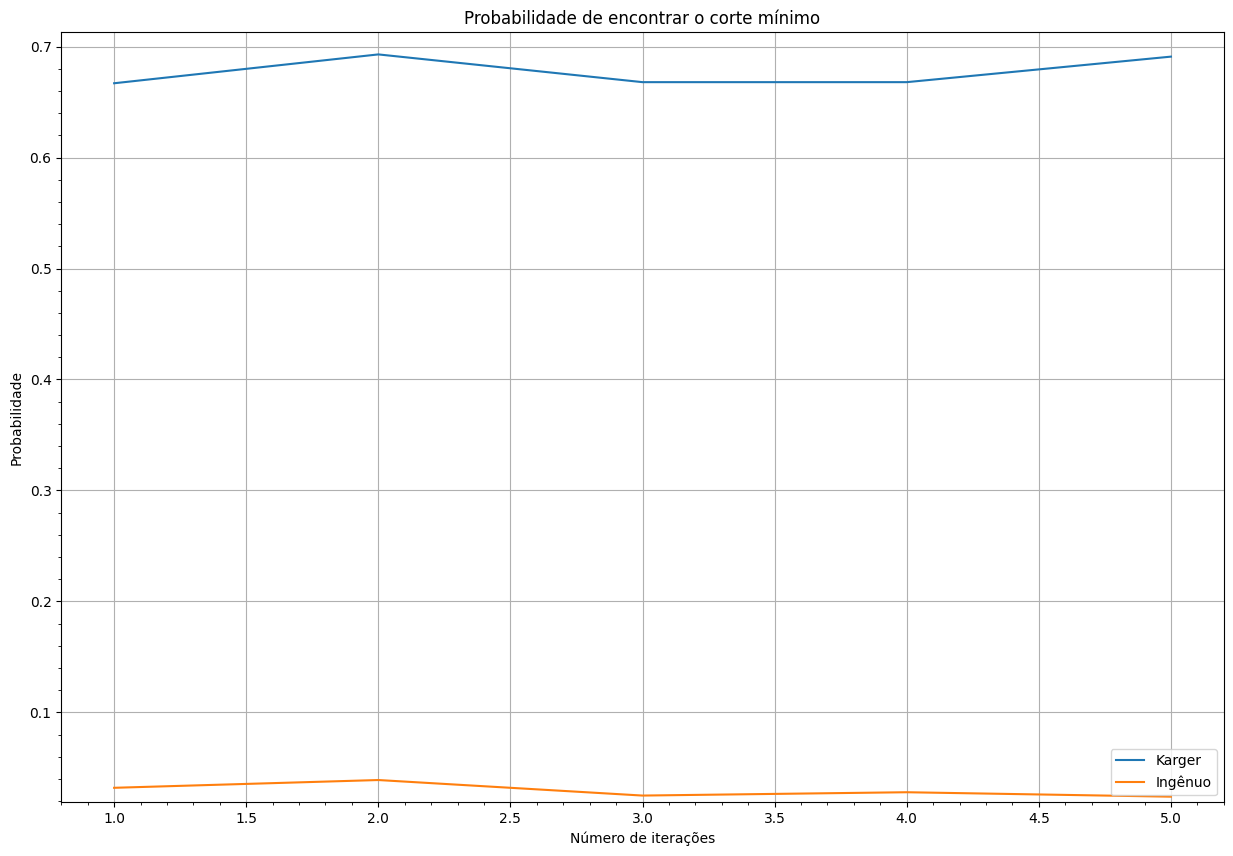

In [26]:
print(prob_karger)
# Cria uma figura com dimensões de 10x6 polegadas
plt.subplots(figsize=(15, 10))

# Plota os gráficos de probabilidade de encontrar o corte mínimo para cada algoritmo
plt.plot(x, prob_karger, label='Karger')
plt.plot(x, prob_ingenuo, label='Ingênuo')

# Define o título do gráfico e dos eixos
plt.title('Probabilidade de encontrar o corte mínimo')
plt.xlabel('Número de iterações')
plt.ylabel('Probabilidade')
plt.grid(True)

plt.minorticks_on()

# Define os limites do eixo y
plt.ylim(min(prob_ingenuo)-0.005,max(prob_karger)+0.02)

# Adiciona a legenda ao gráfico
plt.legend()

# Exibe o gráfico
plt.show()

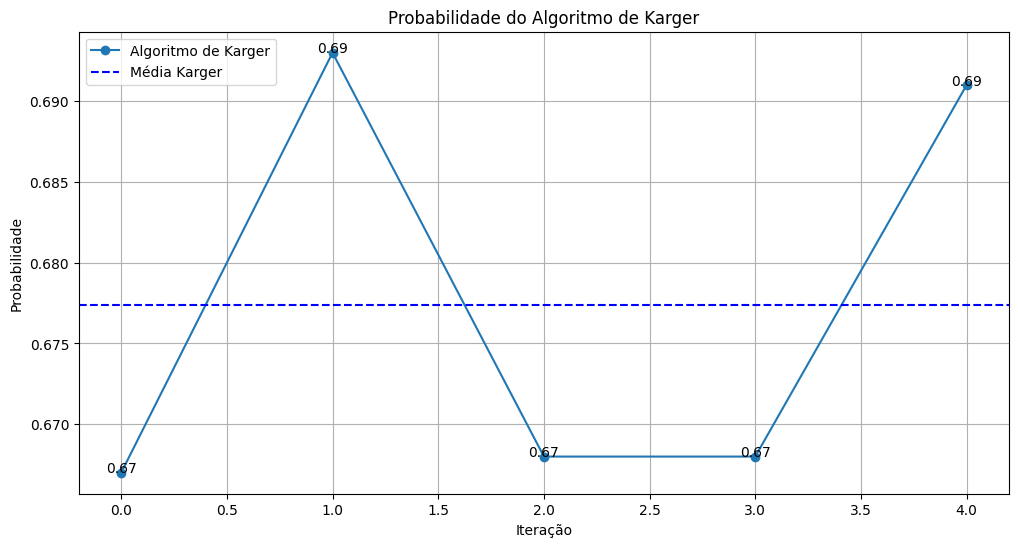

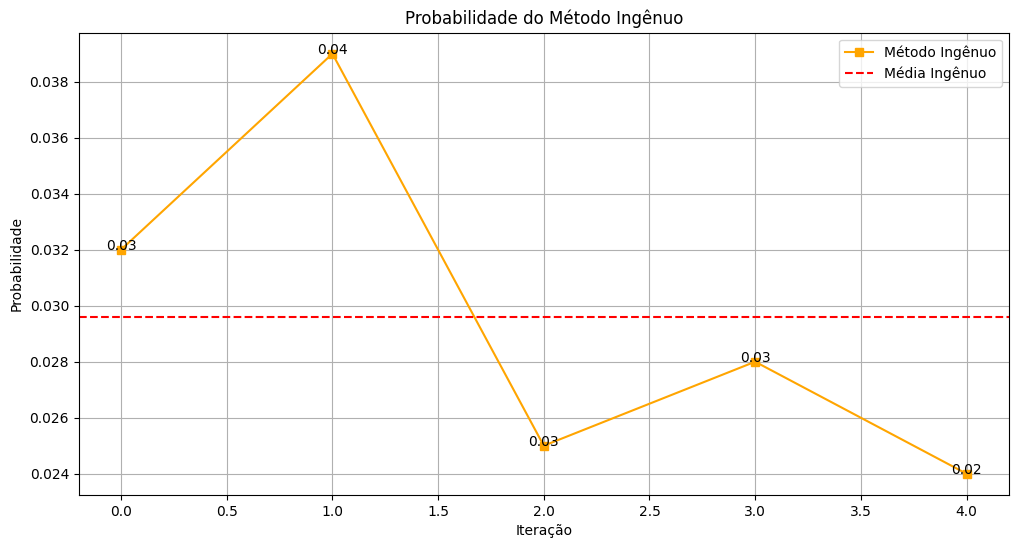

In [27]:
x = list(range(len(prob_karger)))

# Gráfico para probabilidades do Karger
plt.figure(figsize=(12, 6))
plt.plot(x, prob_karger, marker='o', label="Algoritmo de Karger")
plt.axhline(y=sum(prob_karger)/len(prob_karger), color='blue', linestyle='--', label="Média Karger")

# Adiciona valores exatos aos pontos
for i, prob in enumerate(prob_karger):
    plt.text(x[i], prob, f"{prob:.2f}", fontsize=10, ha='center')

plt.title("Probabilidade do Algoritmo de Karger")
plt.xlabel("Iteração")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid()
plt.show()

# Gráfico para probabilidades do método ingênuo
plt.figure(figsize=(12, 6))
plt.plot(x, prob_ingenuo, marker='s', color='orange', label="Método Ingênuo")
plt.axhline(y=sum(prob_ingenuo)/len(prob_ingenuo), color='red', linestyle='--', label="Média Ingênuo")

# Adiciona valores exatos aos pontos
for i, prob in enumerate(prob_ingenuo):
    plt.text(x[i], prob, f"{prob:.2f}", fontsize=10, ha='center')

plt.title("Probabilidade do Método Ingênuo")
plt.xlabel("Iteração")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid()
plt.show()
